
## ECEN250 Lab 3 Notebook

**PART 1 Clustering:**


Clustering is an unsupervised machine learning technique used to group similar data points together. It helps in identifying patterns and structures within a dataset without predefined labels.

**Key Concepts:**

1. Clusters – Groups of similar data points.

2. Similarity – Measured using distance metrics like Euclidean distance.

3. Unsupervised Learning – No prior labels; the algorithm finds patterns on its own.

**Popular Clustering Algorithms:**

1. K-Means – Partitions data into k clusters by minimizing the distance between points and their cluster centers.

2. Hierarchical Clustering – Builds a tree of clusters, useful for understanding relationships.

3. DBSCAN – Groups based on density, useful for irregularly shaped clusters.

**Applications of Clustering:**

1. Customer segmentation in marketing.

2. Image compression and object recognition.

3. Identifying patterns in biological data (e.g., gene expression analysis).

We will practice clustering in this lab first on synthetic cluster datasets.  We will then do clustering on our blower data.

Start by importing necessary libraries -- including make_blobs that create the synthetic clusters

In [1]:
import numpy as np
import os
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
from sklearn import datasets
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

Create a synthetic cluster dataset

In [2]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [3]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Plot the data set

In [4]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

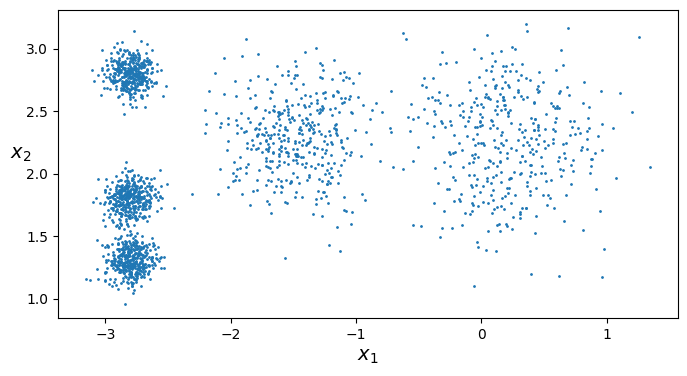

In [5]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

Notice this uses scatter plots -- which we use extensively to visualize clustering in 2D. How many clusters do you see?  Now let's do k-means clustering

**KMeans Clustering:**

In [6]:
from sklearn.cluster import KMeans

Now we are going to do k-means clustering.  This example is very obvious on the number of clusters that we should use.  Modify the following cell to specify the k value for this k-means example.  Once the k (which we call a hyperparameter) is specified, we use the method KMeans to specify that we will use the k-means clustering technique with n_clusters clusters.  In the next line, we use the method fit_predict of kmeans on our data X from above.  fit_predict first creates a model for the X dataset, then applies predict which returns the result of the model.  At times, we fit and predict in separate uses of those methods.

In [7]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

We can use the kmeans attribute cluster_centers_ to show where the k-means model means or "centroids" were located when it completed the iterative assignment/mean movement process. Where are the centroids? List them:

In [8]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

We can now use this clustering to predict which cluster new observations belong. Notice that here we use the predict method to give us predictions for the 4 new points that we are interested in. The model returns the cluster number for which the mean is closest to the new point.

In [9]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1], dtype=int32)

This code will allows to look at the data together with the centroid (mean locations) and the boundaries that show which mean is closest to all of the areas in our 2D example:

In [10]:
def plot_data(X):
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=24, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Call this for the X data that we just clustered into the model kmeans:

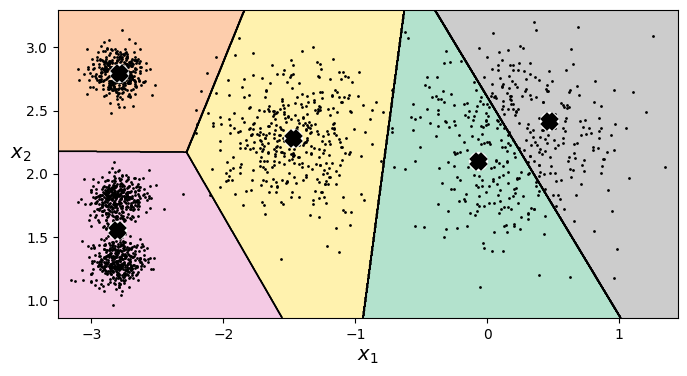

In [11]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Recall that kmeans is an iterative algorithm which starts with a (randomly) assigned location for centroids, assigns observed data to centroids, adjusts the centroid locations, and reassigns the cluster assignments to the new centroid locations, and repeats until no changes are required.

Let's look at the first few iterations --- the following cell contains the code for the first iteration.  Notice that KMeans will set intial means locations, assign nearest, and compute the updated mean locations in 1 iteration.  You control the number of iterations that run through the max_iter parameter.  

Modify the following cell to have three different models: kmeans_iter1, kmeans_iter2, and kmeans_iter3 for 1, 2, and 3 iterations.

In [14]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1, random_state=0)

kmeans_iter1.fit(X)

kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2, random_state=0)

kmeans_iter2.fit(X)

kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3, random_state=0)

kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=0)

Now we can plot how our k-means improves as we add iterations.  Plot the three we just created:

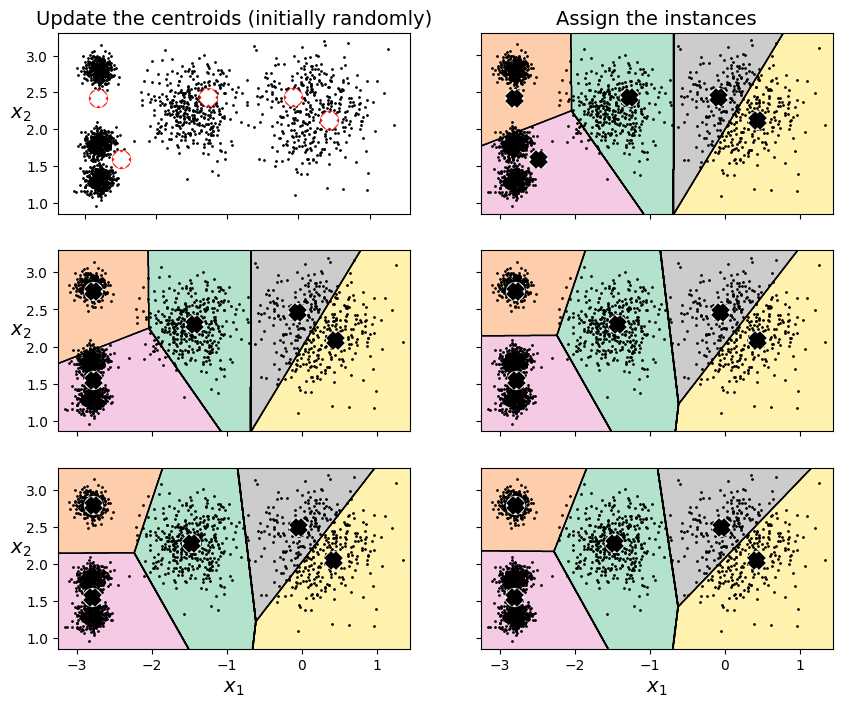

In [15]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Assign the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

Since the initial centroid assignment is done randomly, the same data can be clustered differently with different random initial assignments. The random assignment is controlled by the parameter random_state.  Lets first create some code to compare 2 clustering solutions side-by-side:

In [16]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Now let's create two  differnet clustering solutions for the same data (X) by instantiating two different models, each optimized from a different random initial mean location placement.  

Modify the following cell for different random_states.

Run the cell to see the difference.  

Then try using the same random_state.  Are the solutions different?  

Finally choose another set of different random states and rerun this cell.

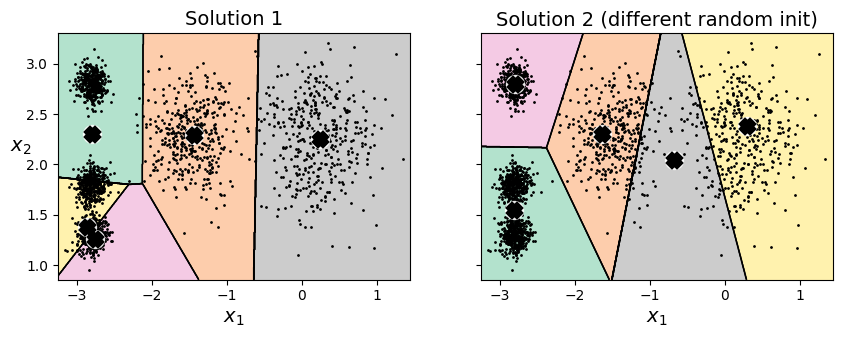

In [18]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1, random_state=3)

kmeans_rnd_init1.fit(X)

kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=2, max_iter=1, random_state=0)

kmeans_rnd_init2.fit(X)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1", "Solution 2 (different random init)")
plt.show()

ANSWER: Setting different random states does produce different results

To select the best model, we will need a way to evaluate a K-Mean model's performance. We can use inertia (the sum of the squared distances between each training instance and its closest centroid)as a metric:

In [19]:
kmeans.inertia_

224.0743312251571

See how the two examples above have different intertia (make sure you reran the example with different random_state values!)

In [20]:
kmeans_rnd_init1.inertia_

364.1877084157653

In [21]:
kmeans_rnd_init2.inertia_

248.44020448914875

Because we have a way to compare our results with inertia, we can run the clustering multiple times (n_init times) and select the clustering with the minimum inertia:

In [22]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

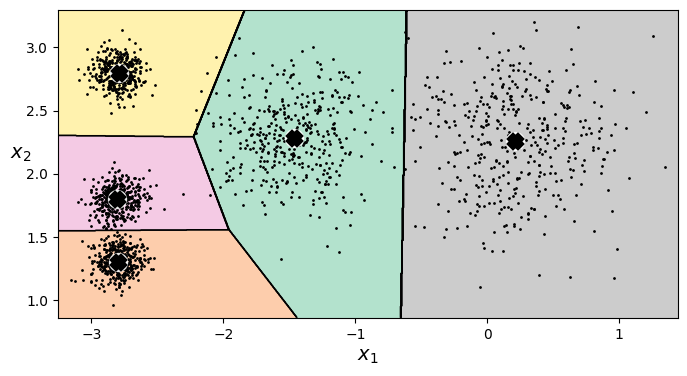

In [23]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Experiment by varying the number of initializations.  Remember that because these are random, with a single initialization you may get the best solution ... and sometimes it may take very many tries at the random initialization.  10 initializations is probably more than we need for this simple example, but for more complex datasets it can require that many, or more!

So, we can find best clustering for a given k, but how do we find the best number of clusters?

We've tried 5. Let's try a smaller and larger k.

Add a cell after this cell that creates two kmeans models -- one for k=3 and another for k=8.  

Then use the plot_clusterer_comparison() function defined above to compare the two results.

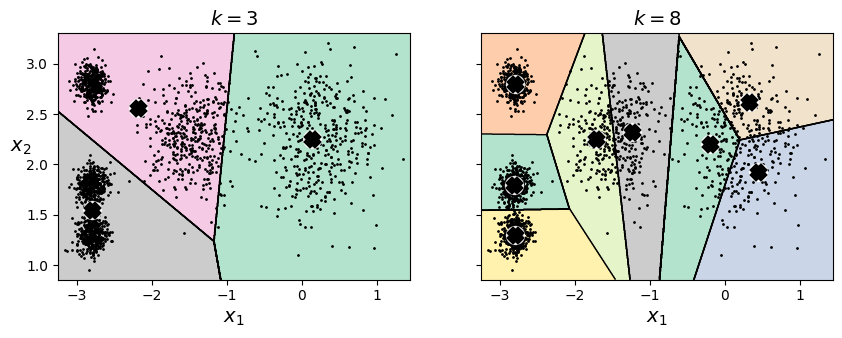

In [24]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

Compare these results to the k=5 example from above. Which k seems to fit our dataset best?

ANSWER: The k=5 seems to fit the best

Remember that we have a way to compare our k_means models:  inertia.  Insert cells below this cell to print the inertia from your k=3 and your k=8 models.

In [26]:
print(f"k=3 inertia: {kmeans_k3.inertia_}")
print(f"k=8 inertia: {kmeans_k8.inertia_}")

k=3 inertia: 653.2167190021554
k=8 inertia: 127.13141880461835


If we used minimum inertia as our metric, which model gives the best results?

ANS: k=8 gives the best results

Is that consistent with the plots that we have just looked at?

ANS: it seems inconsistent

So, inertia alone isn't what we need, since it decreases with increasing k [This should be obvious, right?! -- since it is the sum of squared distance to the nearest centroid). More centroids means we can place them close to our data.  What would our inertia be if we use 2000-means on our X data?  Recall X is made up of 2000 data points.

A better metric is to see how inertia changes as we consider additional clusters.  The following code computes inertia for k=1 to k=10.

In [27]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

By plotting this data, we can see where adding additional means (adding one to k) begins to help less and less.  That point is called the elbow.

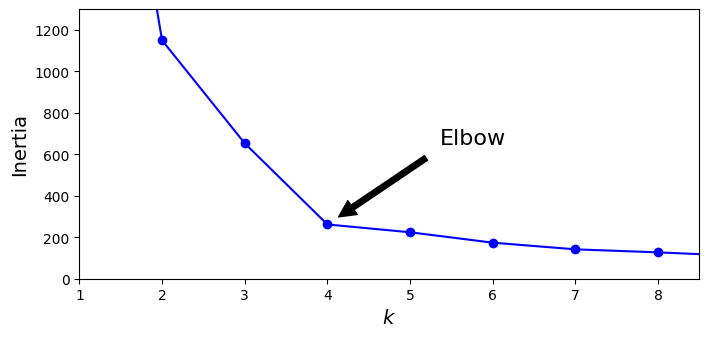

In [28]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

So, we can look at changes in inertia as a selection criteria for k -- we should be using k values at or above the elbow in the trend. In this example, k=4 does not quite accuractly capture the clustering characteristics, but 5 does!

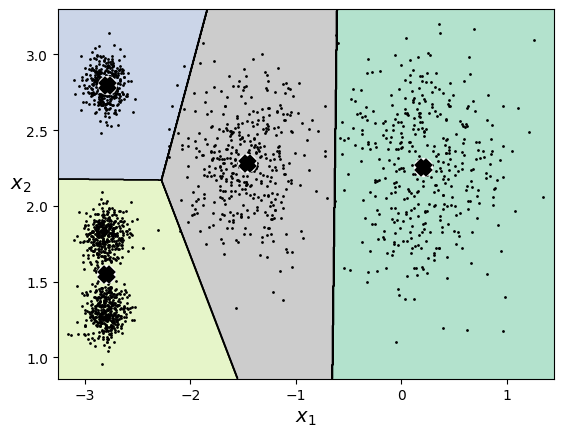

In [29]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Let's look at where k-means struggles -- where clusters are elongated or intertwined. Here the metric of sum of squared distance to the centroid leads to too simple modeling.  First let's create a dataset:

In [30]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Insert a cell with a call to our clustering plotter for this new dataset X. Like we did above for the simple 5 cluster blobs set.

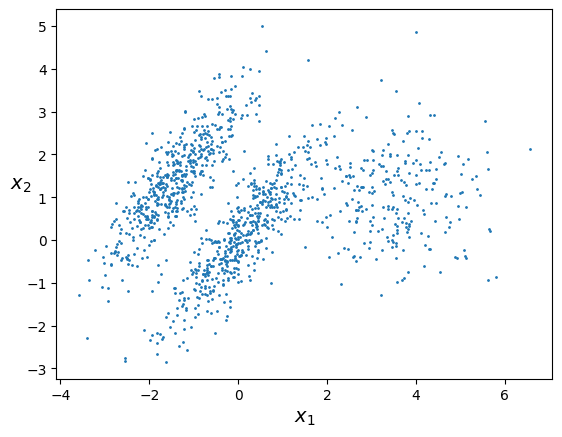

In [31]:
plot_clusters(X)

We are going to let KMeans try to find good solution with a random initialization, and with an initialization that we give to the clusterer:

In [32]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=123)
kmeans_bad = KMeans(n_clusters=3, random_state=123)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=123)

Lets compare the two -- visually and by computing inertias:

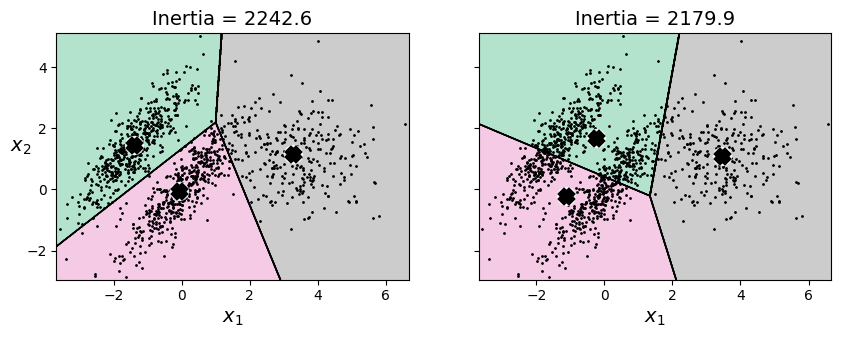

In [33]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

Notice, again that inertia isn't always a measure of the best clustering solution.

Scikit-learn has many other clustering models that more accurately handle cases like this for which k-means is not the best model!

Choose a clustering method that seems more appropriate for the clusters we are using.

Insert a cell below that uses your improved clustering method our X data with a better clustering method. [NOTE you will probably need to import that clusterer before you use it!]

In [36]:
from sklearn.cluster import DBSCAN

# Use DBSCAN
ImprovedCluster = DBSCAN(eps=0.5, min_samples=5)

Since most of the alternative clustering methods are not implemented with predict() methods, showing decision boundaries like we have done for k-means isn't practical.  Instead let's just look at the assignment of the X points to clusters by coloring the dataset by class.  You need to modify the following cell to match the model that you created in the above cell!

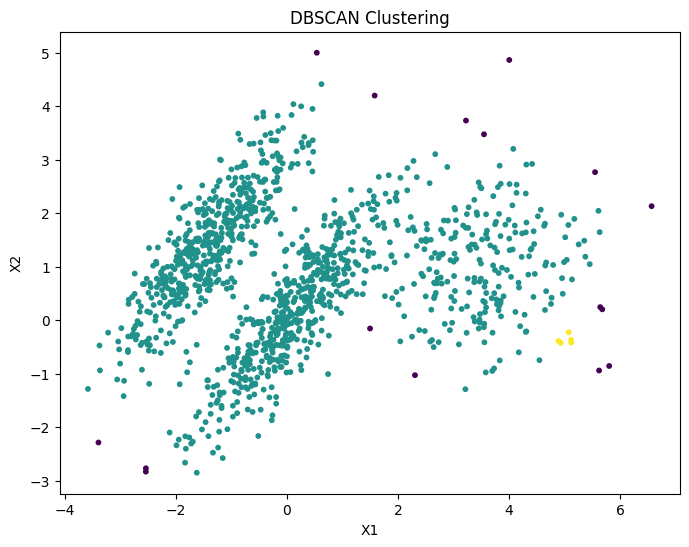

In [39]:
labels = ImprovedCluster.fit_predict(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Part 2: Statistics on Blower Data

In [40]:
import numpy as np
import pandas as pd

In [41]:
from matplotlib import pyplot
from pandas import DataFrame

In [42]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In the previous lab, you worked on cleaning a CSV file. For this lab, we provide the cleaned version in your lab folder, and you will use it here.

In [44]:
!ls drive/MyDrive/ECEN250_LeafBlowersClean.csv

drive/MyDrive/ECEN250_LeafBlowersClean.csv


In [45]:
# importing dataset
df = pd.read_csv('drive/MyDrive/ECEN250_LeafBlowersClean.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manuf         97 non-null     object 
 1   model         97 non-null     object 
 2   retail        97 non-null     object 
 3   volt          97 non-null     float64
 4   no batteries  97 non-null     float64
 5   bat Ahr       97 non-null     float64
 6   bat lb        97 non-null     float64
 7   motor type    97 non-null     float64
 8   sound rating  97 non-null     float64
 9   hi cfm        97 non-null     float64
 10  lo cfm        97 non-null     float64
 11  hi mph        97 non-null     float64
 12  lo mph        97 non-null     float64
 13  weight        97 non-null     float64
 14  price         97 non-null     float64
 15  source        97 non-null     object 
dtypes: float64(12), object(4)
memory usage: 12.3+ KB


Insert code to drop any non-numeric field in the CSV!

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manuf         97 non-null     object 
 1   model         97 non-null     object 
 2   retail        97 non-null     object 
 3   volt          97 non-null     float64
 4   no batteries  97 non-null     float64
 5   bat Ahr       97 non-null     float64
 6   bat lb        97 non-null     float64
 7   motor type    97 non-null     float64
 8   sound rating  97 non-null     float64
 9   hi cfm        97 non-null     float64
 10  lo cfm        97 non-null     float64
 11  hi mph        97 non-null     float64
 12  lo mph        97 non-null     float64
 13  weight        97 non-null     float64
 14  price         97 non-null     float64
 15  source        97 non-null     object 
dtypes: float64(12), object(4)
memory usage: 12.3+ KB


In [48]:
df = df.select_dtypes(include=['number'])

Now that we have reloaded our clean blower data, lets look at some statistics

In [49]:
df['price'].mean()

np.float64(247.7160824742268)

Insert a cell to give the median of the price

In [50]:
df['price'].median()

219.0

Let's do the standard deviations

In [51]:
df['price'].std(ddof=0) # this is for the population standard deviation

136.07087141842854

In [52]:
df['price'].std(ddof=1) # we use this if we're doing sample standard deviation

136.77773784468653

Recall we can get a summary of statistics for the full dataframe using the Pandas describe() method. Insert a cell and do the describe()

In [53]:
df.describe()

,volt,no batteries,bat Ahr,bat lb,motor type,sound rating,hi cfm,lo cfm,hi mph,lo mph,weight,price
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,41.567010,0.927835,3.858763,2.628113,0.170103,65.438144,499.752577,424.927835,144.536082,120.402062,8.940103,247.716082
std,18.308074,0.767130,1.606351,1.325669,0.367187,10.030489,186.629313,194.097014,38.281322,35.920531,5.211666,136.777738
min,18.000000,0.000000,1.500000,0.500000,0.000000,45.000000,80.000000,80.000000,75.000000,45.000000,2.200000,64.970000
25%,20.000000,0.000000,2.500000,1.630000,0.000000,61.000000,410.000000,260.000000,120.000000,101.000000,5.050000,149.000000
50%,40.000000,1.000000,4.000000,2.600000,0.000000,64.000000,510.000000,423.000000,130.000000,120.000000,7.700000,219.000000
75%,56.000000,1.000000,5.000000,3.310000,0.000000,65.000000,615.000000,600.000000,180.000000,145.000000,10.000000,299.000000
max,82.000000,4.000000,8.000000,6.300000,1.000000,107.000000,800.000000,800.000000,200.000000,200.000000,30.000000,699.000000


What type of standard deviation is the default for pandas statistics?  Can you explain why they made that choice?


ANSWER: It uses Sample standard deviation because it is the standard convention and the data is likely only a sample, not the entire population

We can also look at statistics for subsets of our blowers.  For instance we can look a differences in the mean price for entries with zero, one, and two batteries:

In [54]:
nobat=df.loc[df['no batteries'] == 0]
onebat=df.loc[df['no batteries'] == 1]
twobat=df.loc[df['no batteries'] == 2]

In [55]:
nobat['price'].mean()

np.float64(209.4942307692308)

In [56]:
onebat['price'].mean()

np.float64(213.20785714285714)

In [57]:
twobat['price'].mean()

np.float64(414.92076923076917)

Open cells following this cell and compare the difference in mean between zero and 1 battery and the difference in mean price between 1 and 2 batteries. Explicitly write code to compute the mean differences. Should these differences be the same?  Why might they be different?

In [58]:
diff01 = onebat['price'].mean() - nobat['price'].mean()
diff12 = twobat['price'].mean() - onebat['price'].mean()

print(f"Difference in mean price between 0 battery models and 1 battery models: {diff01}")
print(f"Difference in mean price between 1 battery models and 2 battery models: {diff12}")

Difference in mean price between 0 battery models and 1 battery models: 3.71362637362634
Difference in mean price between 1 battery models and 2 battery models: 201.71291208791203


ANSWER: They should not be the same since the means of 0 and 1 batteries are similar, but the mean for 2 batteries is much higher

Histograms help us see how our data is distributed -- and help us visualize where our sampling plans may be limiting our analysis

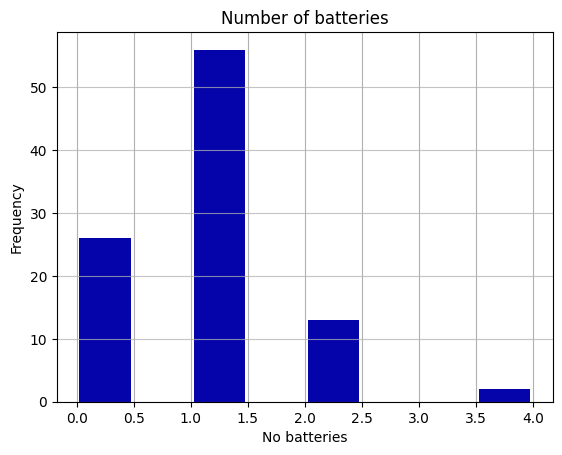

In [59]:
df['no batteries'].plot.hist(grid=True, bins=8, rwidth=0.9,
                   color='#0504aa')
pyplot.title("Number of batteries")
pyplot.ylabel('Frequency')
pyplot.xlabel('No batteries')
pyplot.grid(axis='y', alpha=0.75)

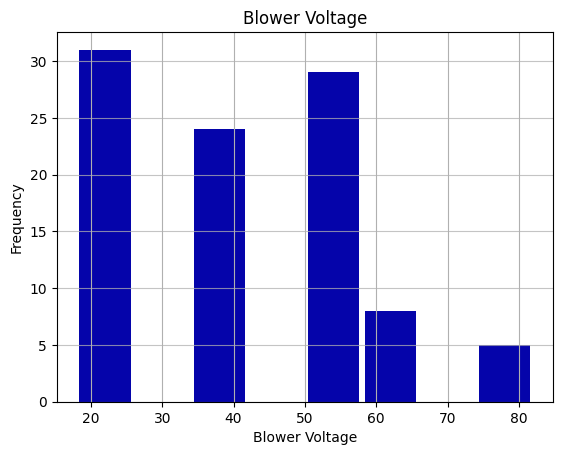

In [60]:
df['volt'].plot.hist(grid=True, bins=8, rwidth=0.9,
                   color='#0504aa')
pyplot.title('Blower Voltage')
pyplot.ylabel('Frequency')
pyplot.xlabel('Blower Voltage')
pyplot.grid(axis='y', alpha=0.75)

Insert a code cell which creates an 8-bin histogram for the hi cfm feature

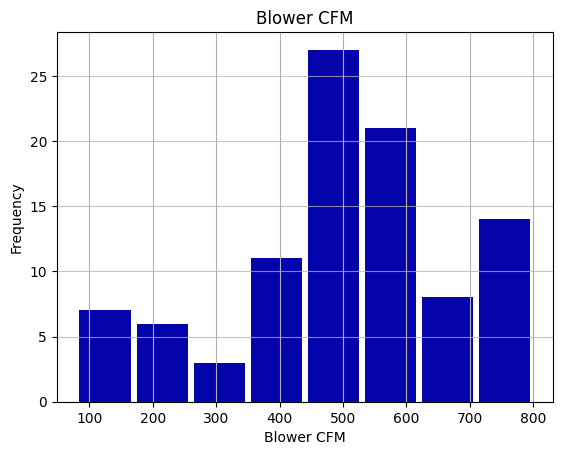

In [61]:
df['hi cfm'].plot.hist(grid=True, bins=8, rwidth=0.9,
                   color='#0504aa')
pyplot.title('Blower CFM')
pyplot.ylabel('Frequency')
pyplot.xlabel('Blower CFM')
pyplot.grid(axis='y', alpha=0.75)

Now insert an 8-bin histogram for price.  Put labels on the x and y axes which describe what the axes represents.

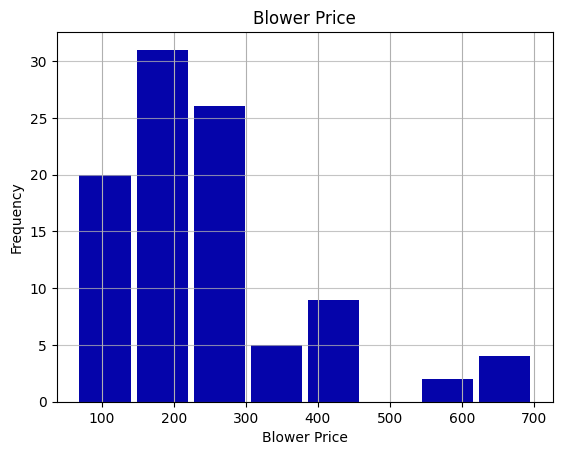

In [62]:
df['price'].plot.hist(grid=True, bins=8, rwidth=0.9,
                   color='#0504aa')
pyplot.title('Blower Price')
pyplot.ylabel('Frequency')
pyplot.xlabel('Blower Price')
pyplot.grid(axis='y', alpha=0.75)

As we saw above describe() gives us lots of statistics about our features.  

In [63]:
df.describe()

,volt,no batteries,bat Ahr,bat lb,motor type,sound rating,hi cfm,lo cfm,hi mph,lo mph,weight,price
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,41.567010,0.927835,3.858763,2.628113,0.170103,65.438144,499.752577,424.927835,144.536082,120.402062,8.940103,247.716082
std,18.308074,0.767130,1.606351,1.325669,0.367187,10.030489,186.629313,194.097014,38.281322,35.920531,5.211666,136.777738
min,18.000000,0.000000,1.500000,0.500000,0.000000,45.000000,80.000000,80.000000,75.000000,45.000000,2.200000,64.970000
25%,20.000000,0.000000,2.500000,1.630000,0.000000,61.000000,410.000000,260.000000,120.000000,101.000000,5.050000,149.000000
50%,40.000000,1.000000,4.000000,2.600000,0.000000,64.000000,510.000000,423.000000,130.000000,120.000000,7.700000,219.000000
75%,56.000000,1.000000,5.000000,3.310000,0.000000,65.000000,615.000000,600.000000,180.000000,145.000000,10.000000,299.000000
max,82.000000,4.000000,8.000000,6.300000,1.000000,107.000000,800.000000,800.000000,200.000000,200.000000,30.000000,699.000000


Use a boxplot (you used boxplot in Lab 2 -- look back if you can't remember the syntax for the method) to look at how the prices are distributed.

Do you have blowers with prices outside the wiskers?  What should we do with these -- keep them in our analysis? exclude them?  Justify your answer.

Our anaysis gets more complicated and more revealing if we look at multiple features and the relationships between these features.  Let's start with a
scatter plot for performance -- hi cfm vs hi mph


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plot outputs
pyplot.scatter(df['hi cfm'], df['hi mph'], color="green", label="Test")


pyplot.xlabel("hi cfm")
pyplot.ylabel("hi mph")
#pyplot.xlim((-1, 8))
#pyplot.ylim((0, 18))

pyplot.show()

Now look at hi mph vs price. Insert a cell to show the cluster plot.

Looking at weight statistics may help you find problem entries.  For example: look at no. batteries vs weight

In [ ]:
# Plot outputs
pyplot.scatter(df['no batteries'], df['weight'], color="green", label="Test")


pyplot.xlabel("no batteries")
pyplot.ylabel("wieght")
#pyplot.xlim((-1, 8))
#pyplot.ylim((0, 18))

pyplot.show()

Or price -- it might also help to do this for only one voltage at a time

In [ ]:
# Plot outputs
pyplot.scatter(df['no batteries'], df['price'], color="green", label="Test")


pyplot.xlabel("no batteries")
pyplot.ylabel("price")
#pyplot.xlim((-1, 8))
#pyplot.ylim((0, 18))

pyplot.show()

NOW: we can look at how different features in our dataframe are related to each other.  Recall that covariance give a measure of relation between the variances of two random variables (features).  We can compute covariances using df.cov()

In [ ]:
df.cov()

More often we examine Pearson's correlation coefficient, R, to determine how features are correlated. This is done with df.corr()

In [ ]:
df.corr()

This table tells us about important relationsips between features.  If we start with price, we see that price depends highly on the cfm  (which is a key performance characteristic!).  Also the price depends on the number of batteries included in the price. Weight is highly correlated with price. We see that with brushless=0 and brushed=1, that price is negatively correlated to price.  Brushed motor blowers are generally cheaper than brushless.  

To help us visualize where we may have issues with our data, we can use pair-plots.

In [ ]:
import seaborn as sns


Using Seaborn pair-plotting, we can observe visually the correlations and the histogram distributions of the features.  

In [ ]:
df_plot = df.iloc[:, 3:15]
sns.pairplot(df_plot, diag_kind='hist')

Note that the histograms on the diagonals help show us how the data in our features and distributed and where there are gaps.  Notice that highly correlated blobs of points in the pair-plot off-diagonal figures will be stretched out from lower left to upper right.  Uncorrelated will be blobs with rising or falling trends. Negatively correlated features will have pair plots that stretch from upper left to lower right -- look at price v. motor type above for an example.

Given that price is highly correlated with high cfm, repeat the above analysis that included the scatter plot for the subset of data hi cfm and price.

# Part 3: Clustering with your blower data

For the data in the above scatter plot, let's use our k-means clustering technique to cluster that data -- let's try 3 clusters.

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1953)
X=df[['hi cfm','price']].to_numpy()
y_pred = kmeans.fit_predict(X)

In [ ]:
# Visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))

Insert a cell below to do k-means clustering of hi cfm and hi mph

Plot it:

In [ ]:
def plot_data(X):
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=24, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 100
    maxs = X.max(axis=0) + 100
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Go back 3 code cells and modify the line k=3 and rerun these cells.  Try a few values of k. Which seems to most closely represent the data in the scatter plot?  Recall we have the elbow method if we wanted to more fully analyze this.

Repeat cluster analysis for price vs number of batteries included in the price.

Add the code cell to build the k-means clustering for k=3 for these two features.

Again plot it, showing decision boundaries:

In [ ]:
def plot_data(X):
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=24, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Does this look like reasonable clusters for the scatter diagram that we just saw?  You may think that there is a problem with the python code.....perhaps, but it is more likely that we have an issue with the data that we are trying to cluster.  Recall that clustering uses Euclidian distances in determining similarity for forming clusers. Open a cell following this and rerun df.describe()

Open a text cell following this cell and give the range of values for price and for no batteries.  Describe generally (no equations) how these difference will affect distances in the 2D plane for price vs no batteries. Suggest a technique that may improve this clustering analysis.

In the cells below, create a new, scaled dataframe and use the scaled dataframe to repeat the price, no batteries clustering and k-means clustering from the last several cells

In [ ]:
# Plot outputs
pyplot.scatter(standardized_df['no batteries'], standardized_df['price'], color="green")


pyplot.ylabel("price")
pyplot.xlabel("no batteries")
#pyplot.xlim((-1, 8))
#pyplot.ylim((0, 18))

pyplot.show()

Notice that for numeric categorical features like number of batteries or voltage that even scaling for k-means doesn't give us decision boundaries that we might expect.  These might do better with an alternative clustering method.

This completes Lab 3.  Now make sure that this notebook shows all your executed cells. If it does not, you can restart the runtime and runall or you can restart the runtime and individually reexecute all of your cells.

The code below converts the ipynb file to PDF, and saves it to where this .ipynb file is.

In [ ]:
NOTEBOOK_PATH = # Enter here, the path to your notebook file, e.g. "/content/drive/MyDrive/ECEN250/ECEN250_Lab3.ipynb"
! pip install playwright
! jupyter nbconvert --to webpdf --allow-chromium-download "$NOTEBOOK_PATH"

Download your notebook as an .ipynb file, then upload it along with the PDF file (saved in the same Google Drive folder as this notebook) to Canvas for Lab 3. Make sure that the PDF file matches your .ipynb file.